In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Package


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the Dataset

In [ ]:
# Load the CSV files into DataFrames
fundamentals_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/fundamentals.csv')
prices_split_adjusted_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices-split-adjusted.csv')
prices_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices.csv')
securities_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/securities.csv')


# Display the first few rows of each DataFrame

In [ ]:
print("Fundamentals DataFrame:")
fundamentals_df.head()

Fundamentals DataFrame:


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
print("\nPrices Split Adjusted DataFrame:")
prices_split_adjusted_df.head()


Prices Split Adjusted DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print("\nPrices DataFrame:")
prices_df.head()


Prices DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print("\nSecurities DataFrame:")
securities_df.head()


Securities DataFrame:


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


# Inspect the Data

In [ ]:
print("\nFundamentals DataFrame Info:")
fundamentals_df.info()


Fundamentals DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                       

In [ ]:
print("\nPrices Split Adjusted DataFrame Info:")
prices_split_adjusted_df.info()


Prices Split Adjusted DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
print("\nPrices DataFrame Info:")
prices_df.info()


Prices DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
print("\nSecurities DataFrame Info:")
securities_df.info()


Securities DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


# Summary statistics

In [ ]:
print("\nFundamentals DataFrame Description:")
fundamentals_df.describe()


Fundamentals DataFrame Description:


,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [ ]:
print("\nPrices Split Adjusted DataFrame Description:")
prices_split_adjusted_df.describe()


Prices Split Adjusted DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
print("\nPrices DataFrame Description:")
prices_df.describe()


Prices DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
print("\nSecurities DataFrame Description:")
securities_df.describe()


Securities DataFrame Description:


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [ ]:
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# Sector Distribution

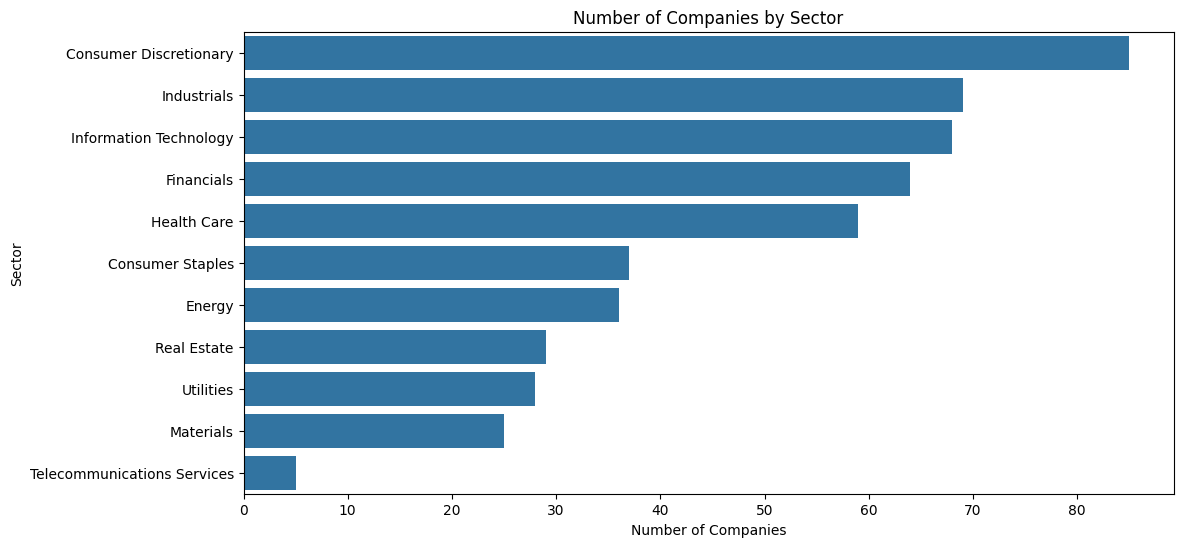

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='GICS Sector', data=securities_df, order=securities_df['GICS Sector'].value_counts().index)
plt.title('Number of Companies by Sector')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()


# Merge Datasets

In [ ]:
# Merge prices and prices_split_adjusted on 'symbol' and 'date'
merged_prices = pd.merge(prices_df, prices_split_adjusted_df, on=['symbol', 'date'], suffixes=('', '_adjusted'))

# Merge with securities on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, securities_df, left_on='symbol', right_on='Ticker symbol')

# Merge with fundamentals on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, fundamentals_df, left_on='symbol', right_on='Ticker Symbol')


# Distribution of Adjusted and Unadjusted Closing Prices

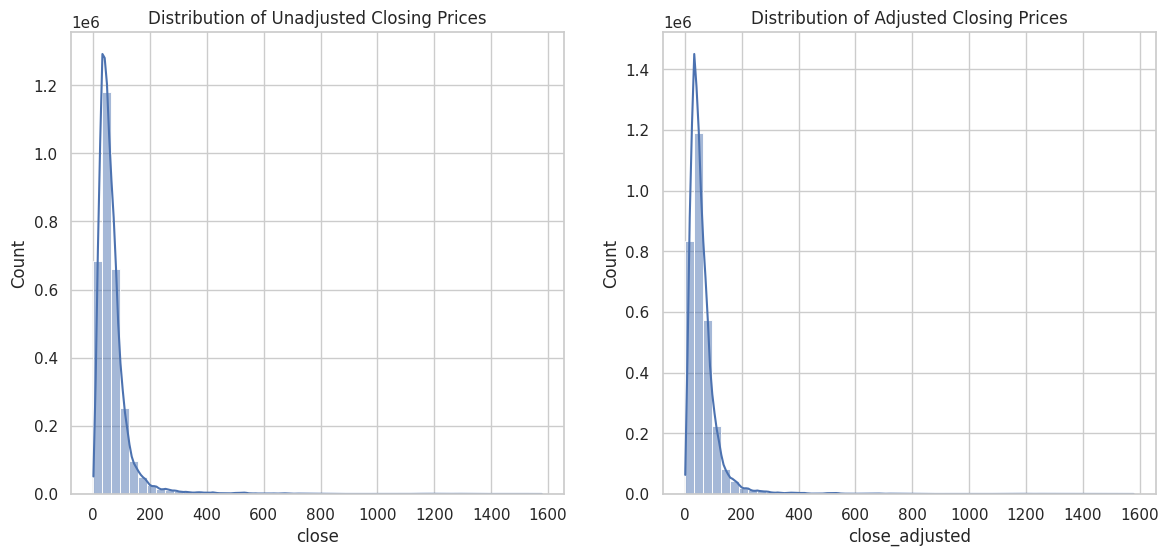

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of Adjusted and Unadjusted Closing Prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['close'], bins=50, kde=True)
plt.title('Distribution of Unadjusted Closing Prices')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['close_adjusted'], bins=50, kde=True)
plt.title('Distribution of Adjusted Closing Prices')
plt.show()


# Trends Over Time for Adjusted vs. Unadjusted Prices

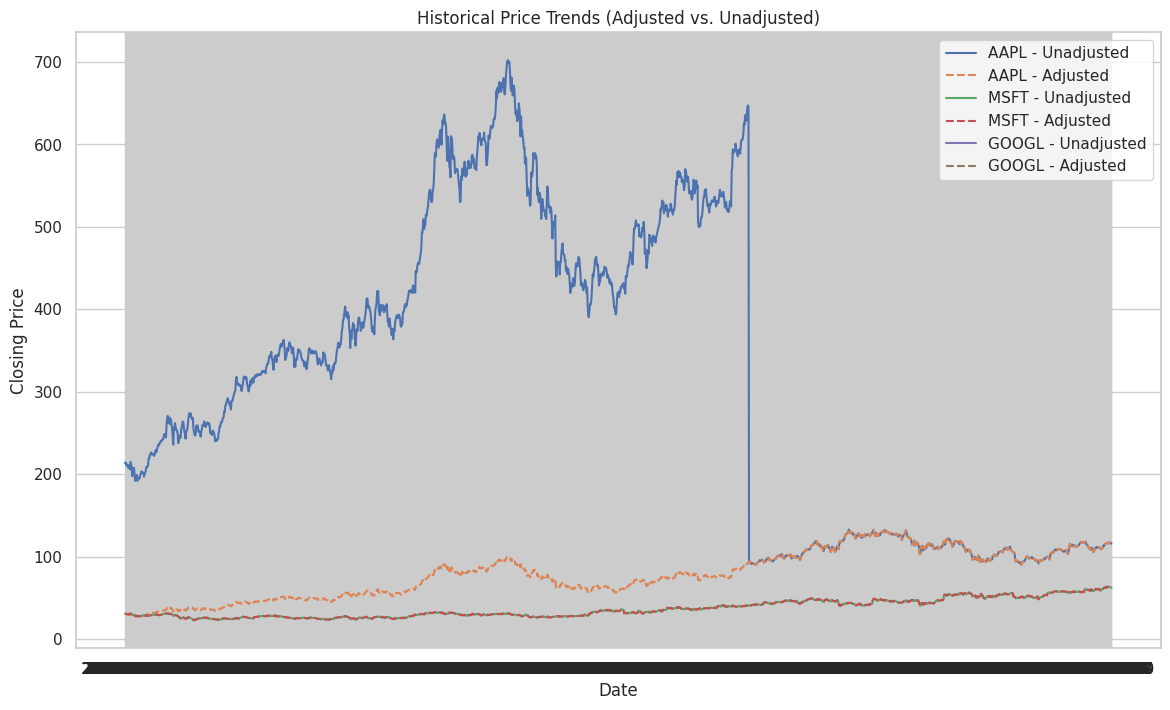

In [ ]:
# Select a few symbols for demonstration
symbols_to_plot = ['AAPL', 'MSFT', 'GOOGL']  # Example symbols
plt.figure(figsize=(14, 8))

for symbol in symbols_to_plot:
    subset = merged_data[merged_data['symbol'] == symbol]
    plt.plot(subset['date'], subset['close'], label=f'{symbol} - Unadjusted')
    plt.plot(subset['date'], subset['close_adjusted'], label=f'{symbol} - Adjusted', linestyle='--')

plt.title('Historical Price Trends (Adjusted vs. Unadjusted)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Correlation Matrix

In [ ]:
# Exclude 'symbol' and 'date' columns from correlation calculation
cols_to_exclude = ['symbol', 'date', 'Ticker Symbol', "For Year", "Period Ending", "Unnamed: 0"]
cols_to_include = [col for col in merged_data.columns if col not in cols_to_exclude]
corr_matrix = merged_data[cols_to_include].corr()


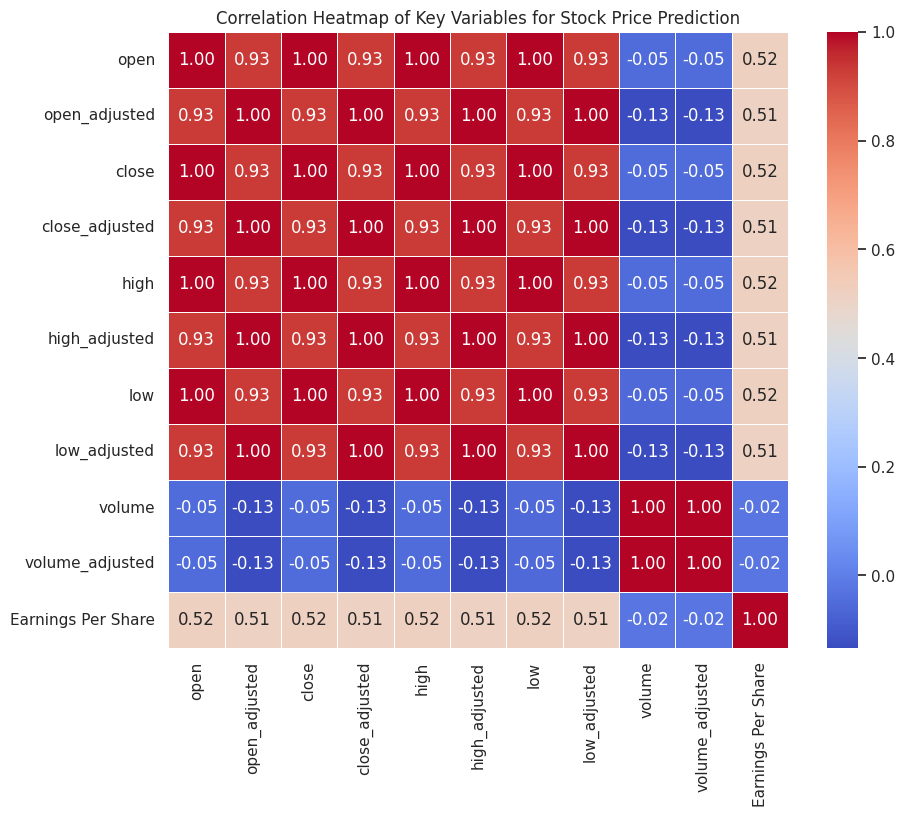

In [ ]:
# Here's a subset of relevant columns based on the correlation matrix you've shown
relevant_columns = ['open','open_adjusted','close', 'close_adjusted', 'high','high_adjusted', 'low','low_adjusted', 'volume', "volume_adjusted", 'Earnings Per Share']

# Subset the correlation matrix
relevant_corr_matrix = corr_matrix.loc[relevant_columns, relevant_columns]

# Plotting the heatmap for relevant correlations
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables for Stock Price Prediction')
plt.show()


## Pre-processing

## Feature Selection

In [ ]:
# Selecting initial important features
initial_features = [
    'date', 'symbol', 'open', 'close','low', 'high', 'volume',
    'Earnings Before Interest and Tax', 'Net Income', 'Operating Income', 'Gross Profit',
    'Profit Margin', 'Gross Margin', 'Operating Margin', 'Pre-Tax Margin', 'After Tax ROE',
    'Earnings Per Share', 'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
    'Short-Term Debt / Current Portion of Long-Term Debt', 'Total Liabilities', 'Total Equity',
    'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
    'Net Cash Flows-Investing', 'Estimated Shares Outstanding', 'Sale and Purchase of Stock'
]

# Drop rows with missing values in the selected features
df_sf = merged_data[initial_features].dropna()

# Convert 'date' column to datetime if not already done
df_sf['date'] = pd.to_datetime(df_sf['date'])

# Check the updated dataframe
df_sf

,date,symbol,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Long-Term Debt,Short-Term Debt / Current Portion of Long-Term Debt,Total Liabilities,Total Equity,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Estimated Shares Outstanding,Sale and Purchase of Stock
0,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
1,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.324000e+09,-1.834000e+09,1.399000e+09,...,1.535300e+10,1.446000e+09,4.500900e+10,-2.731000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,1.630222e+08,0.000000e+00
2,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.099000e+09,2.882000e+09,4.249000e+09,...,1.604300e+10,1.677000e+09,4.120400e+10,2.021000e+09,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,7.169154e+08,-1.052000e+09
3,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,5.496000e+09,7.610000e+09,6.204000e+09,...,1.833000e+10,2.231000e+09,4.278000e+10,5.635000e+09,-604000000.0,6.249000e+09,-1.259000e+09,-5.594000e+09,6.681299e+08,-3.846000e+09
4,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025900,2016-12-23,CSRA,31.930000,31.889999,31.520000,31.930000,371400.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025902,2016-12-27,CSRA,31.940001,32.020000,31.920000,32.110001,892500.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025904,2016-12-28,CSRA,31.980000,31.690001,31.570000,32.220001,816800.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025906,2016-12-29,CSRA,31.549999,31.940001,31.549999,31.980000,501600.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07


In [ ]:
# Resample to monthly data for each symbol
df_monthly = df_sf.groupby(['symbol', pd.Grouper(key='date', freq='M')]).agg({
    'open': 'first',
    'close': 'last',
    'low': 'min',
    'high': 'max',
    'volume': 'sum',
    'Earnings Before Interest and Tax': 'mean',
    'Net Income': 'mean',
    'Operating Income': 'mean',
    'Gross Profit': 'mean',
    'Profit Margin': 'mean',
    'Gross Margin': 'mean',
    'Operating Margin': 'mean',
    'Pre-Tax Margin': 'mean',
    'After Tax ROE': 'mean',
    'Earnings Per Share': 'mean',
    'Current Ratio': 'mean',
    'Quick Ratio': 'mean',
    'Cash Ratio': 'mean',
    'Long-Term Debt': 'mean',
    'Short-Term Debt / Current Portion of Long-Term Debt': 'mean',
    'Total Liabilities': 'mean',
    'Total Equity': 'mean',
    'Net Cash Flow': 'mean',
    'Net Cash Flow-Operating': 'mean',
    'Net Cash Flows-Financing': 'mean',
    'Net Cash Flows-Investing': 'mean',
    'Estimated Shares Outstanding': 'mean',
    'Sale and Purchase of Stock': 'mean'
}).reset_index()

df_monthly


,symbol,date,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Long-Term Debt,Short-Term Debt / Current Portion of Long-Term Debt,Total Liabilities,Total Equity,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Estimated Shares Outstanding,Sale and Purchase of Stock
0,AAL,2010-01-31,4.840000,5.310000,4.470000,5.960000,1.049924e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
1,AAL,2010-02-28,5.430000,7.330000,5.350000,7.400000,9.228604e+08,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
2,AAL,2010-03-31,7.410000,7.350000,6.810000,8.170000,6.952804e+08,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
3,AAL,2010-04-30,7.370000,7.070000,6.270000,7.870000,1.306894e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
4,AAL,2010-05-31,7.210000,8.830000,5.700000,8.970000,1.048033e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,ZTS,2016-08-31,50.470001,51.099998,49.290001,52.639999,2.439360e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29217,ZTS,2016-09-30,51.150002,52.009998,50.070000,52.169998,2.249505e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29218,ZTS,2016-10-31,51.759998,47.799999,47.759998,53.139999,1.936863e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29219,ZTS,2016-11-30,47.610001,50.380001,46.860001,52.189999,2.746035e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
